# Продвинутое машинное обучение: ДЗ 1

Студент: Бакулев Владимир Леонидович

Группа: MADE-DS-22

Почта: vlbakulev@gmail.com

In [1]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import multivariate_normal

from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline

## Часть I: О теореме Байеса

##### Задание 1.1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

##### Решение

Обозначим через $g$ - приговор подсудимому: 

$$
g=\begin{cases}
1,&\text{если подсудимый виновен;}\\
0,&\text{если подсудимый виновен,}
\end{cases}
$$

а через $b$ - принадллежность редкой группы крови человеку:

$$
b=\begin{cases}
1,&\text{у подсудимого редкая группа крови;}\\
0,&\text{у подсудимого другая группа крови.}
\end{cases}
$$

Тогда из условия задачи:

1. $p(b=1|g=1)=1$ - если подсудимый виновен, то у него точно редкая группа крови;

2. $p(b=1|g=0)=0.01$ - если подсудимый не виновен, то у него редкая группа крови с низкой вероятностью

Прокрурор сделал следующее утверждение:

$$
\neg p(b=1|g=0)=1-0.01=0.99,
$$

которое можно переписать как:

$$
\neg p(b=1|g=0)=p(b=0|g=0),
$$

т.е. на самом деле прокурор оценил вероятность не иметь редкую группу крови при условии невиновности подсудимого. Прокурор должен был оценить вероятность виновности при условии, что у подсудимого редкая группа крови, найденная на месте преступления.

Применяем теорему Байеса:

$$
p(g=1|b=1) = \dfrac{p(b=1|g=1)p(a=1)}{p(b=1)} = \dfrac{p(b=1|g=1)p(g=1)}{p(b=1|g=1)p(g=1) + p(b=1|g=0)p(g=0)},
$$

которое полсе подстановки значений вероятности принимает вид:

$$
p(g=1|b=1) = \dfrac{p(g=1)}{p(g=1) + 0.01 \cdot p(g=0)} = \dfrac{p(g=1)}{p(g=1) + 0.01 \cdot (1 - p(g=1))} 
= \dfrac{p(g=1)}{0.01 + 0.99 \cdot p(g=1)}
$$ 


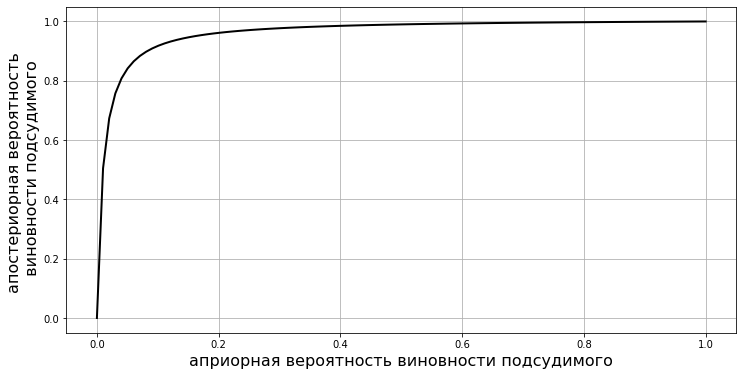

In [2]:
p_g1 = np.linspace(0., 1., 100) # априорная вероятность виновности подсудимого
p_g1b1 = p_g1 / (0.01 + 0.99 * p_g1) # апостериорная вероятность виновности подсудимого (после прикрепления к делу 
                                     # материалов по анализу крови)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(p_g1, p_g1b1, linewidth=2, color="black")
ax.set_xlabel('априорная вероятность виновности подсудимого', fontsize=16)
ax.set_ylabel('апостериорная вероятность \n виновности подсудимого', fontsize=16)
ax.grid()

Таким образом, для оглашения приговора после прикрепления к дела фактов об анализе грови с места преступления прокурору необходимо понимать априорную вероятность виновности подсудимого. Если, например, он априорную вероятность принимал на основании подбрасывания "честной" монетки, т.е. $p(g=1)=0.5$, то тогда апостериорная вероятность виновоности будет $99\%$. Судя по ответу он бы так и сделал.

Но будет ли поле этого монетка честной...

##### Задание 1.2

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

##### Решение

Адвокат объяснил прокурору о необходимости использования теоремы Байеса. Однако в качестве априорной вероятности взял $p(g=1)=1 / N$, где $N = 10^6$, что соотвествует равномерному распределения и характеризует полную неопределенность виновности подсудимого. 

Как в случае прокурора, так и в случае адвоката, необходимы дополнительные материалы расследования.

##### Задание 1.3

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

##### Решение

Обозначим через $d$ - наличие страшной болезни: 

$$
d=\begin{cases}
1,&\text{болен;}\\
0,&\text{здоров,}
\end{cases}
$$

а через $t$ - результат теста:

$$
t=\begin{cases}
1,&\text{положительный;}\\
0,&\text{отрицательный.}
\end{cases}
$$

Тогда из условия задачи $p(d=1)=0.01, p(d=0)=0.99$ - болезнь встречается у одного процента населения.

Обозначим для удобства:

1. $p(t=1|d=0)=p_{FP}$ - вероятность FalsePositives (когда тест выдаёт положительный результат у здорового человека)

2. $p(t=0|d=1)=p_{FN}$ - вероятность FalseNegatives (когда тест выдаёт отрицательный результат у больного)

Применяя теорему Байеса получаем выражения:

1. Для апостериорной вероятности болезни после положительного теста

$$
p(d=1|t=1) = \dfrac{(1 - p_{FN})p(d=1)}{(1 - p_{FN})p(d=1) + p_{FP}p(d=0)};
$$

2. Для апостериорной вероятности болезни после отрицательного теста

$$
p(d=1|t=0) = \dfrac{p_{FN}p(d=1)}{p_{FN}p(d=1) + (1 - p_{FP})p(d=0)};
$$

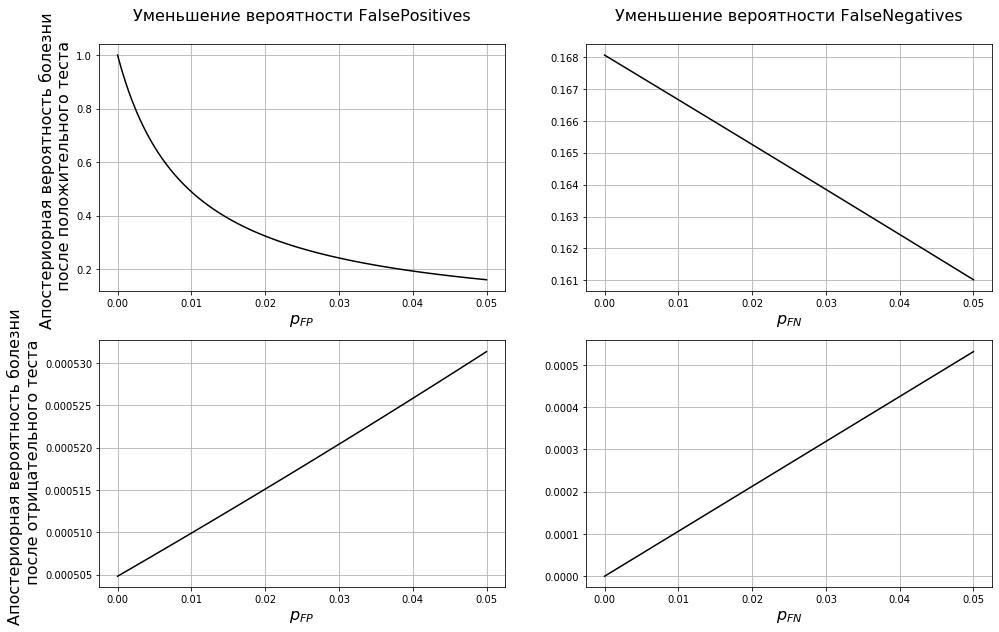

In [3]:
def p_d1t1(p_FN, p_FP):
    p_d0, p_d1 = 0.99, 0.01
    return (1 - p_FN) * p_d1 / ((1 - p_FN) * p_d1 + p_FP * p_d0)

def p_d1t0(p_FN, p_FP):
    p_d0, p_d1 = 0.99, 0.01
    return p_FN * p_d1 / (p_FN * p_d1 + (1 - p_FP) * p_d0)

p = np.linspace(0., 0.05, 100)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

axes[0, 0].set_title('Уменьшение вероятности FalsePositives\n', fontsize=16)
axes[0, 0].plot(p, p_d1t1(p_FN=0.05, p_FP=p), 'k', label='train')
axes[0, 0].set_xlabel('$p_{FP}$', fontsize=16)
axes[0, 0].set_ylabel('Апостериорная вероятность болезни \n после положительного теста', fontsize=16)

axes[0, 1].set_title('Уменьшение вероятности FalseNegatives\n', fontsize=16)
axes[0, 1].plot(p, p_d1t1(p_FN=p, p_FP=0.05), 'k', label='train')
axes[0, 1].set_xlabel('$p_{FN}$', fontsize=16)

axes[1, 0].set_ylabel('Апостериорная вероятность болезни \n после отрицательного теста', fontsize=16)
axes[1, 0].plot(p, p_d1t0(p_FN=0.05, p_FP=p), 'k', label='train')
axes[1, 0].set_xlabel('$p_{FP}$', fontsize=16)

axes[1, 1].plot(p, p_d1t0(p_FN=p, p_FP=0.05), 'k', label='train')
axes[1, 1].set_xlabel('$p_{FN}$', fontsize=16)

for i in range(4):
    i_ = i // 2, i % 2
    axes[i_].grid()
        
plt.show()

Из анализа графиков следует, что апостериорная вероятность болезни после теста после положительного теста нелинейно зависит от вероятности FalsePositives и приемлемая верятность 99% достигается при существенном уменьшении вероятности FalsePositives, тем временем апостериорные вероятности болезни практически линейно зависит вероятности FalseNegatives, а следовательно результат будет заметен приктически сразу.

Учитывая тот факт, что во время пандемии в первую очередь необходимо изолировать больных (что возможно при качественном "отлове"), то врачам необходимо уменьшать вероятность FalseNegatives.

# Часть II: О линейной регрессии

##### Задание 2.1

Скачайте данные по ссылке https://ourworldindata.org/coronavirus-source-data в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

##### Решение

In [4]:
all_countries_df = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv',
    parse_dates=['date'], 
    usecols=['location', 'date', 'total_cases', 'new_cases'],
)
all_countries_df['new_cases'] = all_countries_df['new_cases'].replace(0., 1.)

##### Задание 2.2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

##### Решение

In [5]:
TRAIN_COUNT_DAYS = 50
FIRST_DAY_FOR_RUSSIA = datetime.datetime(2020, 3, 3)

In [6]:
def plot_data_for_country(df=all_countries_df, 
                          country_name='Russia', 
                          date_begin=FIRST_DAY_FOR_RUSSIA, 
                          train_count=TRAIN_COUNT_DAYS,
                         ):
    
    current_df = df[df['location'] == country_name]
    current_df = current_df[current_df['date'] >= date_begin]
    print('Число заболевших в первый день', int(current_df['total_cases'].tolist()[0]))
    
    train_df = current_df.iloc[:train_count, :]
    test_df = current_df.iloc[train_count:, :]
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
    fig.autofmt_xdate()

    axes[0, 0].set_title('Тренировочные данные\n', fontsize=16)
    axes[0, 0].plot(train_df['date'], train_df['total_cases'], 'k', label='train')
    axes[0, 0].set_ylabel('Общее число заражений', fontsize=16)

    axes[0, 1].plot(train_df['date'], train_df['total_cases'], 'k', label='train', linewidth=3)
    axes[0, 1].plot(test_df['date'], test_df['total_cases'], 'r:', label='test')
    axes[0, 1].set_title('За весь период наблюдений \n', fontsize=16)

    axes[1, 0].plot(train_df['date'], train_df['new_cases'], 'k', label='train')
    axes[1, 0].set_ylabel('Число новых случаев заражения', fontsize=16)

    axes[1, 1].plot(train_df['date'], train_df['new_cases'], 'k', label='train', linewidth=3)
    axes[1, 1].plot(test_df['date'], test_df['new_cases'], 'r:', label='test')

    for i in range(4):
        i_ = i // 2, i % 2
        axes[i_].grid()
        axes[i_].legend(fontsize=14)
        axes[i_].set_xlabel('Дата', fontsize=14)
        
    plt.show()
    
    return current_df, train_df, test_df

Число заболевших в первый день 3


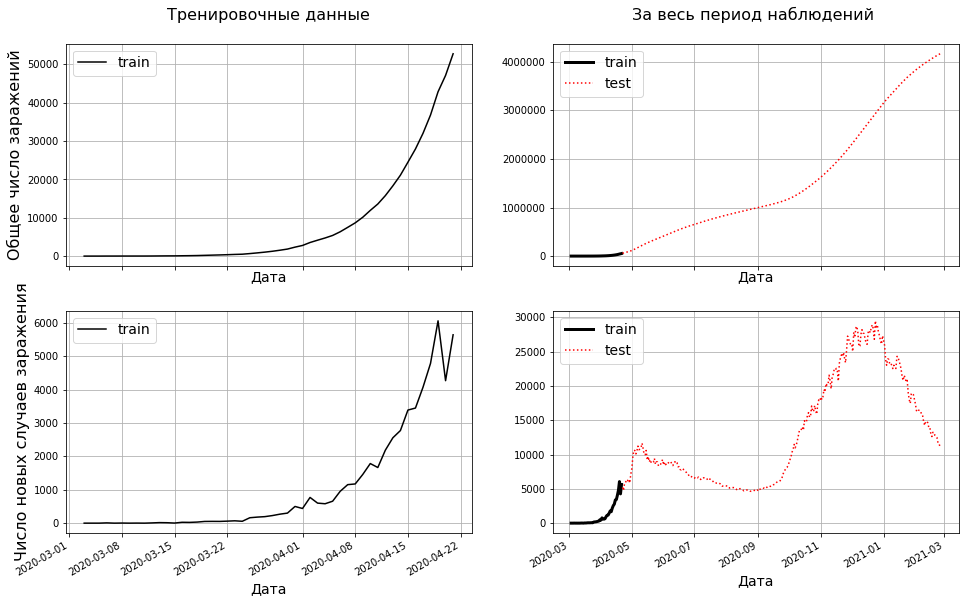

In [7]:
df, train_df, test_df = plot_data_for_country()

##### Задание 2.2a

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

##### Решение

Поскольку в предлагаемой модели линейная функция находится в экспоненте, то целесообразно в качестве целевой переменной взять логарифм от общего числа заболевших.

Дисперсия шума в данных: 0.1218


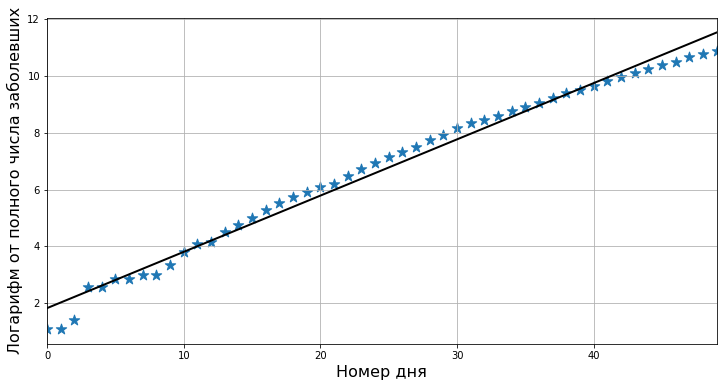

In [8]:
x = np.arange(TRAIN_COUNT_DAYS, dtype=np.float)
y = np.log(train_df['total_cases'].to_numpy())

degree_features = 1
x_d = np.vstack([x ** i for i in range(1, degree_features + 1)]).transpose()

init_lin_reg = LinearRegression(fit_intercept=True).fit(x_d, y)
lin_reg_w = init_lin_reg.intercept_, init_lin_reg.coef_ 
noise_ = (init_lin_reg.predict(x_d) - y).var()
print('Дисперсия шума в данных:', round(noise_, 4))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Номер дня', fontsize=16)
ax.set_ylabel('Логарифм от полного числа заболевших', fontsize=16)
ax.set_xlim((x[0], x[-1]))
ax.scatter(x, y, marker='*', s=120)
ax.plot(x, init_lin_reg.predict(x_d), linewidth=2, label="Исходная функция", color="black")
ax.grid()

##### Задание 2.2b
Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

##### Решение

В качестве априорного распределения параметров модели возьмем нормальное распределение. При этом мы знаем, что статистика начинается с трех заболевших (математическое ожидание $w_0 = \ln 3$), а роста первые дни незначительный (математическое ожидание $w_1 = 0$).

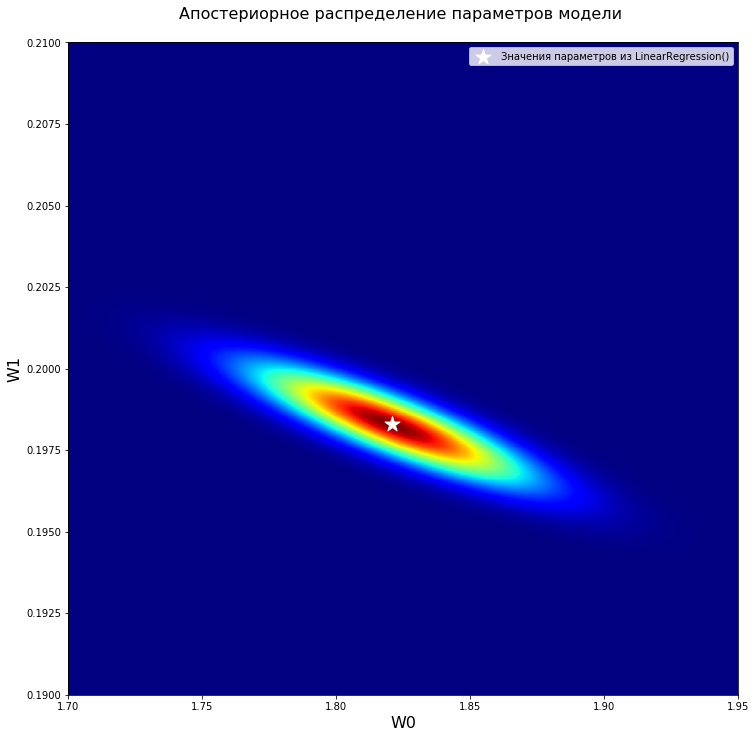

In [9]:
mu_0 = np.array([np.log(3), 0.])
sigma_0 = (10 ** 2) * np.array([[1, 0], [0, 1]])
alpha = 1 / (noise_)

x_matrix = np.hstack((np.ones((len(x_d), 1)), x_d))

sigma_n = np.linalg.inv(np.linalg.inv(sigma_0)+ (alpha ** 2) * np.matmul(np.transpose(x_matrix), x_matrix))
mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma_0), np.transpose(mu_0)) + (alpha ** 2) * np.matmul(np.transpose(x_matrix), y ) )

N = 1000
x_coord = np.linspace(1.7, 1.95, N)
y_coord = np.linspace(0.19, 0.21, N)
x_coord, y_coord = np.meshgrid(x_coord, y_coord)

pos = np.empty(x_coord.shape + (2,))
pos[:, :, 0] = x_coord
pos[:, :, 1] = y_coord

Z = multivariate_normal.pdf(pos, mean=mu_n, cov=sigma_n)

fig = plt.figure(figsize=(12, 12))

plt.pcolormesh(x_coord, y_coord, Z, cmap=plt.cm.jet);
plt.scatter(lin_reg_w[0], lin_reg_w[1], marker='*', s=250, color='white', label='Значения параметров из LinearRegression()')
plt.xlabel('W0', fontsize=16)
plt.ylabel('W1', fontsize=16)
plt.title('Апостериорное распределение параметров модели \n', fontsize=16)
plt.legend();

##### Задание 2.2с
Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

##### Решение

/home/vovan/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


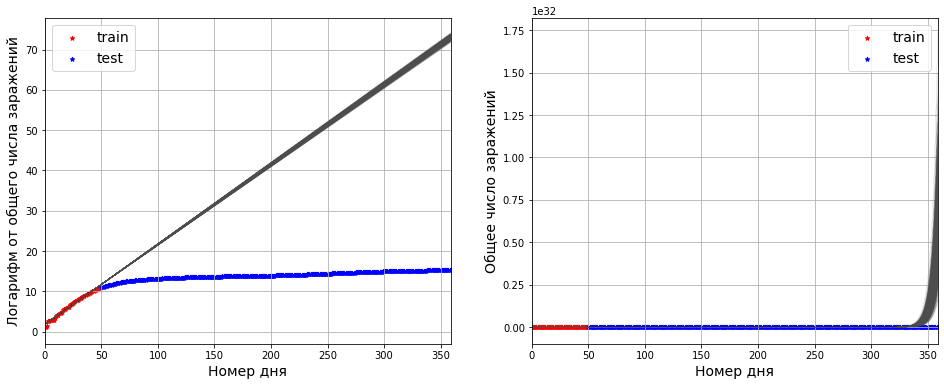

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

count_samples = 1000
my_w = np.random.multivariate_normal(mu_n, sigma_n, count_samples)
ALL_COUNT_DAYS = df.shape[0]
res = np.zeros((count_samples, ALL_COUNT_DAYS))
all_x = np.arange(ALL_COUNT_DAYS, dtype=np.float)
for i, w in enumerate(my_w):
    res[i,:] = w[0] + w[1] * all_x
    axes[0].plot(all_x, res[i,:], linewidth=.1, color="0.3")
    res[i,:] = np.exp(res[i,:])
    axes[1].plot(all_x, res[i,:], linewidth=.1, color="0.3")
    
axes[0].scatter(all_x[:TRAIN_COUNT_DAYS], np.log(df['total_cases'][:TRAIN_COUNT_DAYS]), 
                marker='*', s=20, color='red', label='train')
axes[0].scatter(all_x[TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], np.log(df['total_cases'][TRAIN_COUNT_DAYS: ALL_COUNT_DAYS]), 
                marker='*', s=20, color='blue', label='test')

axes[1].scatter(all_x[:TRAIN_COUNT_DAYS], df['total_cases'][:TRAIN_COUNT_DAYS], 
                marker='*', s=20, color='red', label='train')
axes[1].scatter(all_x[TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], df['total_cases'][TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], 
                marker='*', s=20, color='blue', label='test')

axes[0].set_ylabel('Логарифм от общего числа заражений', fontsize=14)
axes[1].set_ylabel('Общее число заражений', fontsize=14)

for i in range(2):
    axes[i].set_xlim((all_x[0], all_x[-1]))
    axes[i].legend(fontsize=14)
    axes[i].set_xlabel('Номер дня', fontsize=14)
    axes[i].grid()
    
plt.show()

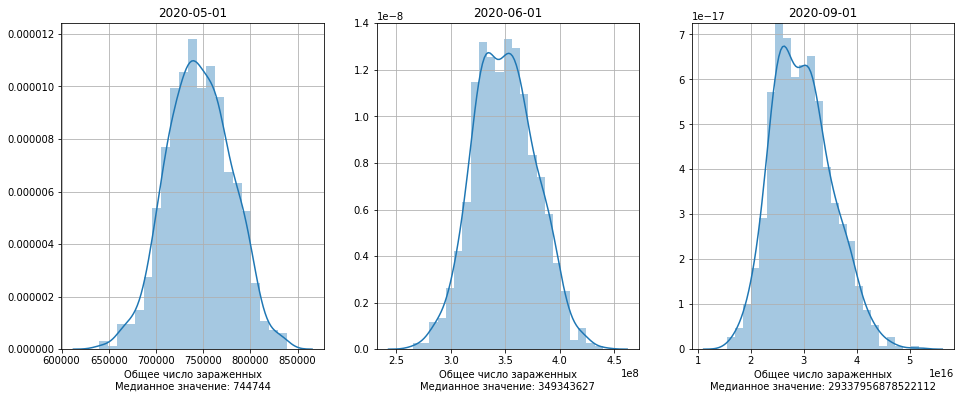

In [11]:
control_dates = [datetime.datetime(2020, 5, 1), datetime.datetime(2020, 6, 1), datetime.datetime(2020, 9, 1)]
fig, axes = plt.subplots(nrows=1, ncols=len(control_dates), figsize=(16, 6))

for i, date_ in enumerate(control_dates):
    count_days = (date_ - FIRST_DAY_FOR_RUSSIA).days
    current_res = res[:, count_days]
    sns.distplot(current_res, ax=axes[i])

    info_str = '\n'.join(['Общее число зараженных', ''.join(['Медианное значение: ', str(int(np.median(current_res)))])])
    axes[i].set_xlabel(info_str)
    axes[i].set_title(date_.date())
    axes[i].grid()

По этой модели полгода назад население Земли должно было перестать существовать.

##### Задание 2.3
Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:

$$
\Phi(x) = \int\limits_{-\infty}^x\frac{1}{2\pi}
e^{-t^2/2}dt
$$

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

##### Задание 2.3a
Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

##### Решение

Перепишем функцию распределения гауссиана в виде:

$$
\Phi(x) = \int\limits_{-\infty}^x
e^{w_2 t^2 + w_1 t+ w_0}dt
$$

и возьмем производную от функции распределения:

$$
\Phi'(x) = e^{w_2 x^2 + w_1 x+ w_0}
$$

и будем ей моделировать приращение общего числа заболевших, которое соответсвует количеству новых случаев заражения в день. Также как и в предыдущей задаче целесообразно перейти к логарифму целевой функции.

Дисперсия шума в данных: 0.2393


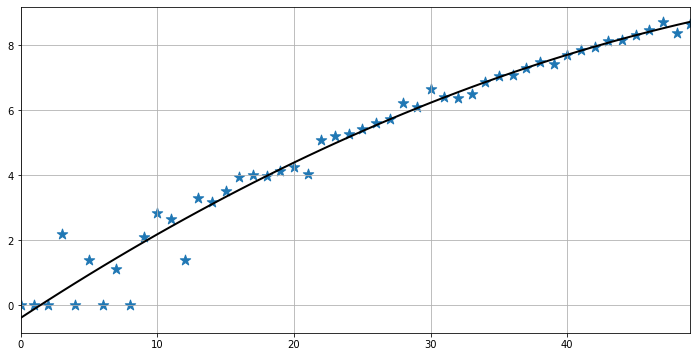

In [12]:
x = np.arange(TRAIN_COUNT_DAYS, dtype=np.float)
y = np.log(train_df['new_cases'].to_numpy())

degree_features = 2
x_d = np.vstack([x ** i for i in range(1, degree_features + 1)]).transpose()

init_lin_reg = LinearRegression(fit_intercept=True).fit(x_d, y)
lin_reg_w = init_lin_reg.intercept_, init_lin_reg.coef_ 
noise_ = (init_lin_reg.predict(x_d) - y).var()
print('Дисперсия шума в данных:', round(noise_, 4))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.set_xlim((x[0], x[-1]))
ax.scatter(x, y, marker='*', s=120)
ax.plot(x, init_lin_reg.predict(x_d), linewidth=2, label="Исходная функция", color="black")
ax.grid()

##### Задание 2.3b
Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [13]:
mu_0 = np.array([0., 0., 0.])
sigma_0 = 10 ** 2 * np.array([[1, 0, 0], [0, 1, 0], [0, 0., 1.]])
alpha = 1 / noise_

x_matrix = np.hstack((np.ones((len(x_d), 1)), x_d))

sigma_n = np.linalg.inv(np.linalg.inv(sigma_0)+ (alpha ** 2) * np.matmul(np.transpose(x_matrix), x_matrix))
mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma_0), np.transpose(mu_0)) + (alpha ** 2) * np.matmul(np.transpose(x_matrix), y ) )

##### Задание 2.3с
Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

/home/vovan/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


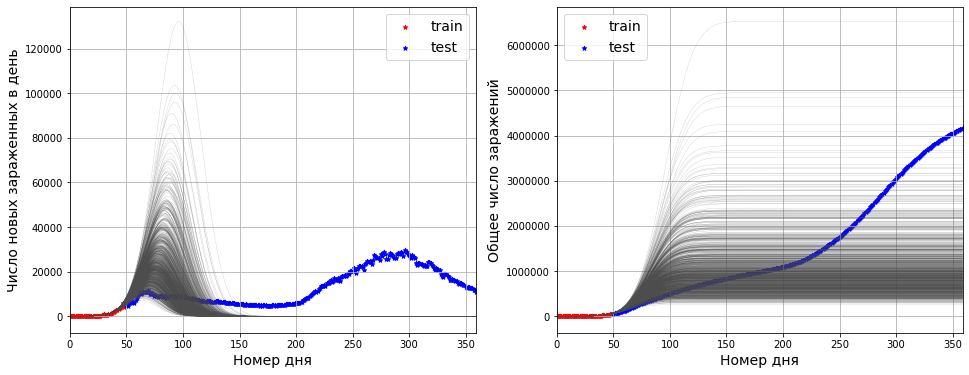

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

count_samples = 1000
my_w = np.random.multivariate_normal(mu_n, sigma_n, count_samples)
ALL_COUNT_DAYS = df.shape[0]
res = np.zeros((count_samples, ALL_COUNT_DAYS))
total_res = np.zeros((count_samples, ALL_COUNT_DAYS))
all_x = np.arange(ALL_COUNT_DAYS, dtype=np.float)
for i, w in enumerate(my_w):
    res[i,:] = np.exp(w[0] + w[1] * all_x + w[2] * all_x ** 2)
    axes[0].plot(all_x, res[i,:], linewidth=.1, color="0.3")
    total_res[i,:] = np.cumsum(res[i,:])
    axes[1].plot(all_x, total_res[i,:], linewidth=.1, color="0.3")
    
axes[0].scatter(all_x[:TRAIN_COUNT_DAYS], df['new_cases'][:TRAIN_COUNT_DAYS], 
                marker='*', s=20, color='red', label='train')
axes[0].scatter(all_x[TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], df['new_cases'][TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], 
                marker='*', s=20, color='blue', label='test')

axes[1].scatter(all_x[:TRAIN_COUNT_DAYS], df['total_cases'][:TRAIN_COUNT_DAYS], 
                marker='*', s=20, color='red', label='train')
axes[1].scatter(all_x[TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], df['total_cases'][TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], 
                marker='*', s=20, color='blue', label='test')

axes[0].set_ylabel('Число новых зараженных в день', fontsize=14)
axes[1].set_ylabel('Общее число заражений', fontsize=14)

for i in range(2):
    axes[i].set_xlim((all_x[0], all_x[-1]))
    axes[i].legend(fontsize=14)
    axes[i].set_xlabel('Номер дня', fontsize=14)
    axes[i].grid()
    
plt.show()

Оптимистический сценарий: 490992 заражений
Пессимистический сценарий: 1854965 заражений


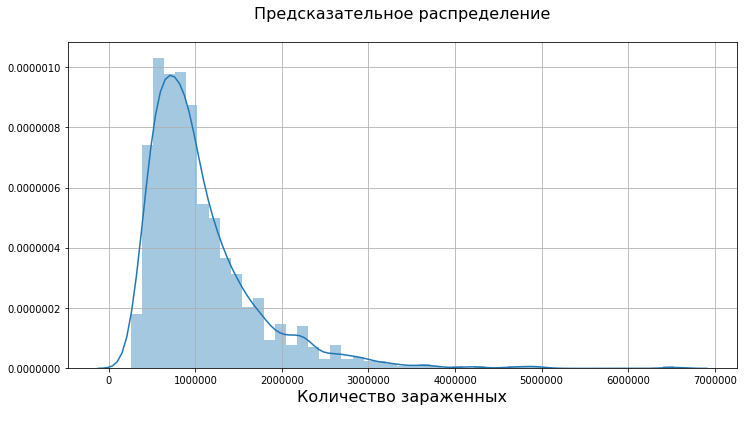

In [15]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

current_total_res = total_res[:, -1]
sns.distplot(current_total_res)
ax.set_title('Предсказательное распределение\n', fontsize=16)
ax.set_xlabel('Количество зараженных\n', fontsize=16)
ax.grid()
print('Оптимистический сценарий:', int(np.percentile(current_total_res, 10)), 'заражений')
print('Пессимистический сценарий:', int(np.percentile(current_total_res, 90)), 'заражений')

##### Задание 2.4 (Бонус)
Проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

In [16]:
def analysis_covid_for_country(df=all_countries_df, 
                          country_name='Russia', 
                          date_begin=FIRST_DAY_FOR_RUSSIA, 
                          train_count=TRAIN_COUNT_DAYS,
                         ):
    
    current_df = df[df['location'] == country_name]
    current_df = current_df[current_df['date'] >= date_begin]
    print('Число заболевших в первый день', int(current_df['total_cases'].tolist()[0]))
    
    train_df = current_df.iloc[:train_count, :]
    test_df = current_df.iloc[train_count:, :]
    
    x = np.arange(TRAIN_COUNT_DAYS, dtype=np.float)
    y = np.log(train_df['new_cases'].to_numpy())

    degree_features = 2
    x_d = np.vstack([x ** i for i in range(1, degree_features + 1)]).transpose()

    init_lin_reg = LinearRegression(fit_intercept=True).fit(x_d, y)
    lin_reg_w = init_lin_reg.intercept_, init_lin_reg.coef_ 
    noise_ = (init_lin_reg.predict(x_d) - y).var()
    
    mu_0 = np.array([0., 0., 0.])
    sigma_0 = 10 ** 2 * np.array([[1, 0, 0], [0, 1, 0], [0, 0., 1.]])
    alpha = 1 / noise_

    x_matrix = np.hstack((np.ones((len(x_d), 1)), x_d))

    sigma_n = np.linalg.inv(np.linalg.inv(sigma_0)+ (alpha ** 2) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma_0), np.transpose(mu_0)) + (alpha ** 2) * np.matmul(np.transpose(x_matrix), y ) )
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

    count_samples = 100
    my_w = np.random.multivariate_normal(mu_n, sigma_n, count_samples)
    ALL_COUNT_DAYS = current_df.shape[0]
    res = np.zeros((count_samples, ALL_COUNT_DAYS))
    total_res = np.zeros((count_samples, ALL_COUNT_DAYS))
    all_x = np.arange(ALL_COUNT_DAYS, dtype=np.float)
    for i, w in enumerate(my_w):
        res[i,:] = np.exp(w[0] + w[1] * all_x + w[2] * all_x ** 2)
        axes[0].plot(all_x, res[i,:], linewidth=.1, color="0.3")
        total_res[i,:] = np.cumsum(res[i,:])
        axes[1].plot(all_x, total_res[i,:], linewidth=.1, color="0.3")
    
    axes[0].scatter(all_x[:TRAIN_COUNT_DAYS], current_df['new_cases'][:TRAIN_COUNT_DAYS], 
                marker='*', s=20, color='red', label='train')
    axes[0].scatter(all_x[TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], current_df['new_cases'][TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], 
                marker='*', s=20, color='blue', label='test')

    axes[1].scatter(all_x[:TRAIN_COUNT_DAYS], current_df['total_cases'][:TRAIN_COUNT_DAYS], 
                marker='*', s=20, color='red', label='train')
    axes[1].scatter(all_x[TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], current_df['total_cases'][TRAIN_COUNT_DAYS: ALL_COUNT_DAYS], 
                marker='*', s=20, color='blue', label='test')

    axes[0].set_ylabel('Число новых зараженных в день', fontsize=14)
    axes[1].set_ylabel('Общее число заражений', fontsize=14)

    for i in range(2):
        axes[i].set_xlim((all_x[0], all_x[-1]))
        axes[i].legend(fontsize=14)
        axes[i].set_xlabel('Номер дня', fontsize=14)
        axes[i].grid()
        
    plt.suptitle(country_name, fontsize=20)
    plt.show()
    
    return {
        'country': country_name, 
        'median_total_cases': np.median(total_res[:, -1]),
        'median_new_cases': np.median(np.max(res[:, :], axis=1)),
    }

In [17]:
np.random.seed(666)
list_countries = all_countries_df[all_countries_df['total_cases'] > 5 * 10 ** 5]['location'].unique()
np.random.shuffle(list_countries)
print(list_countries[:6])

['United Kingdom' 'Pakistan' 'World' 'Bangladesh' 'Poland' 'North America']


In [18]:
list_countries_properte = []

Число заболевших в первый день 22


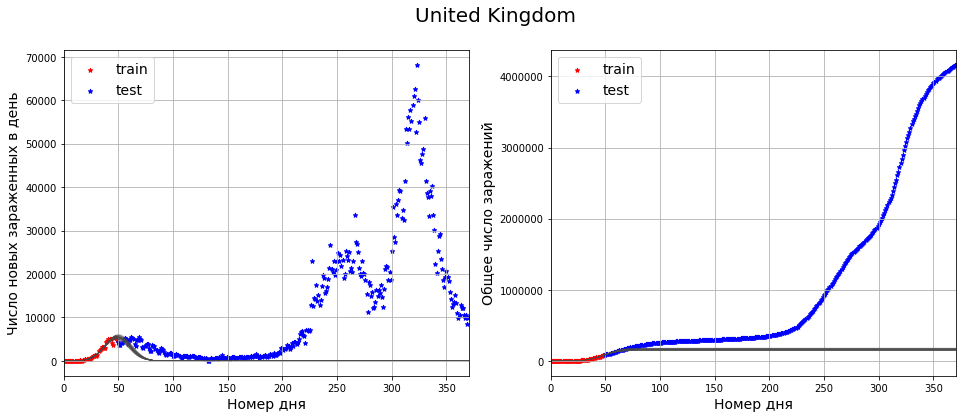

In [19]:
dict_ = analysis_covid_for_country(df=all_countries_df, 
                          country_name=list_countries[0], 
                          date_begin=datetime.datetime(2020, 2, 20),
                          train_count=TRAIN_COUNT_DAYS,
                          )

list_countries_properte.append(dict_)

Число заболевших в первый день 2


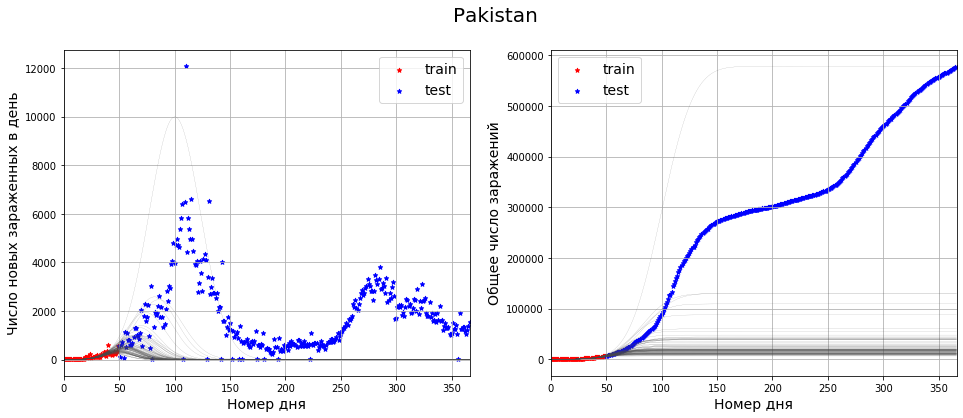

In [20]:
dict_ = analysis_covid_for_country(df=all_countries_df, 
                          country_name=list_countries[1], 
                          date_begin=datetime.datetime(2020, 2, 23),
                          train_count=TRAIN_COUNT_DAYS,
                          )

list_countries_properte.append(dict_)

Число заболевших в первый день 75652


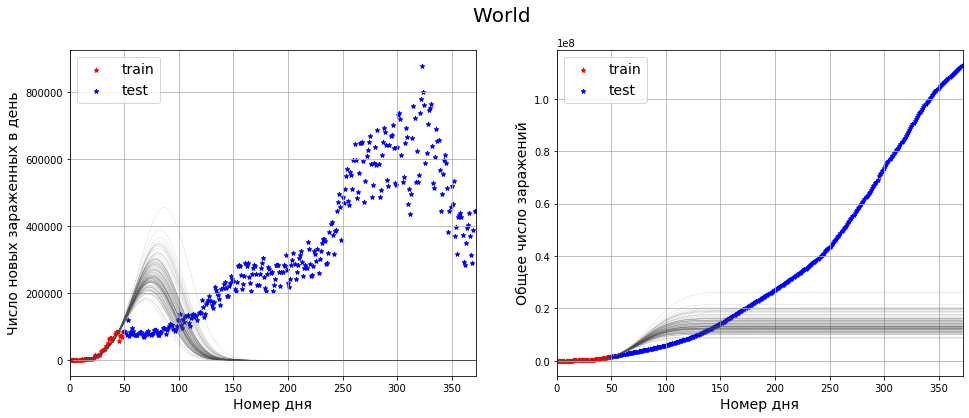

In [21]:
dict_ = analysis_covid_for_country(df=all_countries_df, 
                          country_name=list_countries[2], 
                          date_begin=datetime.datetime(2020, 2, 19),
                          train_count=TRAIN_COUNT_DAYS,
                          )

list_countries_properte.append(dict_)

Число заболевших в первый день 20


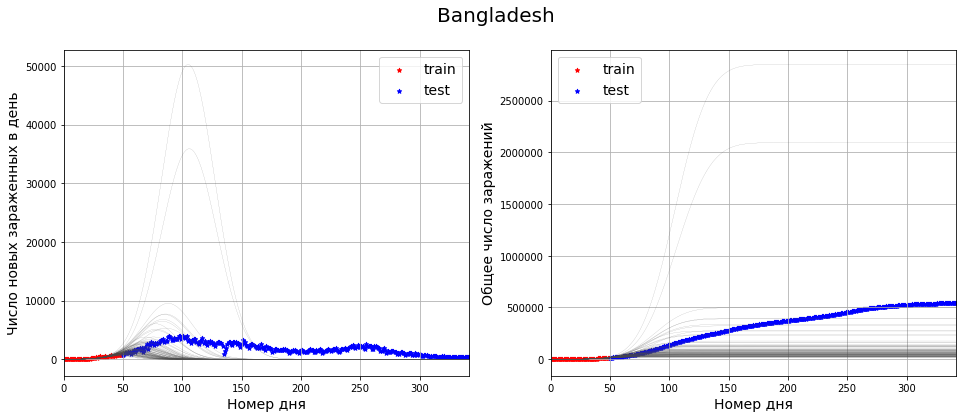

In [22]:
dict_ = analysis_covid_for_country(df=all_countries_df, 
                          country_name=list_countries[3], 
                          date_begin=datetime.datetime(2020, 3, 20),
                          train_count=TRAIN_COUNT_DAYS,
                          )

list_countries_properte.append(dict_)

Число заболевших в первый день 5


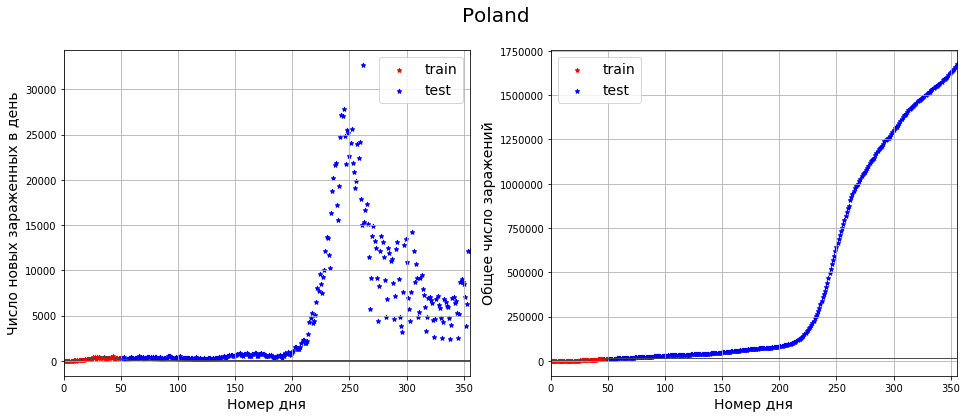

In [23]:
dict_ = analysis_covid_for_country(df=all_countries_df, 
                          country_name=list_countries[4], 
                          date_begin=datetime.datetime(2020, 3, 7),
                          train_count=TRAIN_COUNT_DAYS,
                          )

list_countries_properte.append(dict_)

Число заболевших в первый день 27


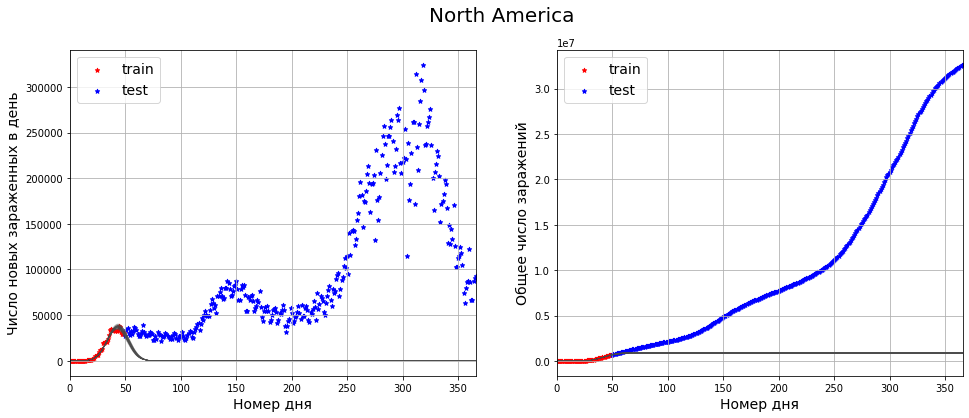

In [24]:
dict_ = analysis_covid_for_country(df=all_countries_df, 
                          country_name=list_countries[5], 
                          date_begin=datetime.datetime(2020, 2, 25),
                          train_count=TRAIN_COUNT_DAYS,
                          )

list_countries_properte.append(dict_)

Число заболевших в первый день 3


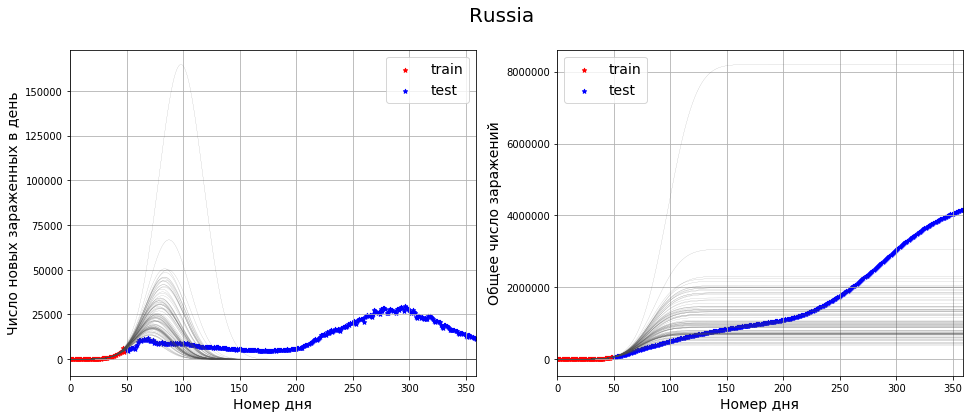

In [25]:
dict_ = analysis_covid_for_country()

list_countries_properte.append(dict_)

In [26]:
dict_count_peoples = {
    'United Kingdom': 66.65e+6, 
    'Pakistan': 212.2e+6, 
    'World': 7.594e+9, 
    'Bangladesh': 161.4e+6, 
    'Poland': 37.97e+6,
    'North America': 579e+6,
    'Russia': 144.5e+6,
}

In [27]:
list_countries[:6]

array(['United Kingdom', 'Pakistan', 'World', 'Bangladesh', 'Poland',
       'North America'], dtype=object)

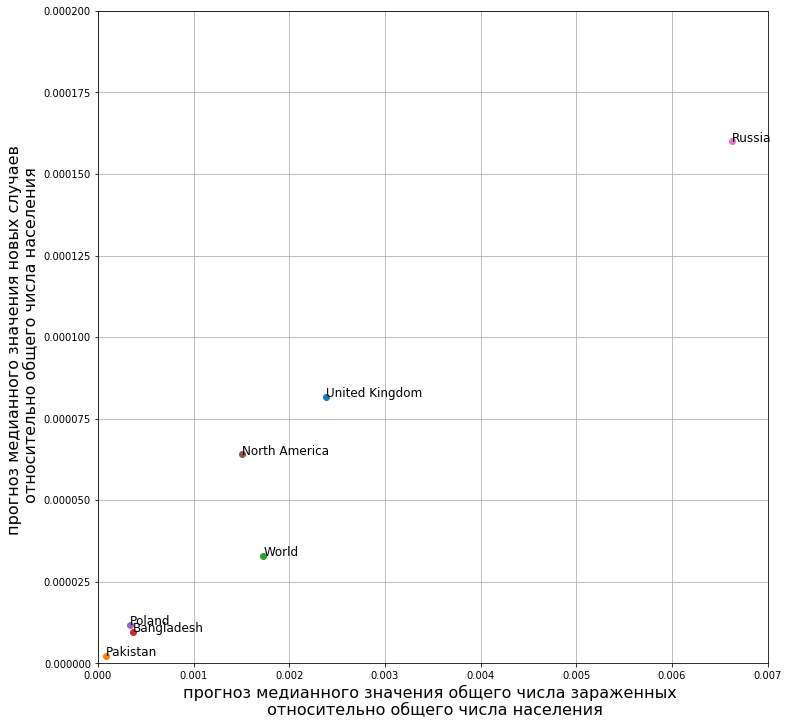

In [28]:
fig, ax = plt.subplots(figsize=(12, 12))
for country_data in list_countries_properte:
    _count_peoples = dict_count_peoples[country_data['country']]
    _total_cases = country_data['median_total_cases'] / _count_peoples
    _new_cases = country_data['median_new_cases'] / _count_peoples
    ax.scatter(_total_cases, _new_cases, )
    ax.annotate(country_data['country'], (_total_cases, _new_cases), fontsize=12)
    
ax.set_xlim((0., 0.007))
ax.set_ylim((0, 2e-4))
ax.set_xlabel('прогноз медианного значения общего числа зараженных \n относительно общего числа населения', fontsize=16)
ax.set_ylabel('прогноз медианного значения новых случаев \n относительно общего числа населения', fontsize=16)
ax.grid()

Самое простое, что можно сделать - это кластеризовать страны относительно средних показателей во всем мире.
В нашем случае можно выделить три группы:
1. Параметры схожи со среднемировыми (United Kingdom, North America)
2. Параметры значительно меньше среднемировых (Pakistan, Bangladesh, Poland)
3. Параметры значительно больше среднемировых (Russia)

##### Задание 2.5
(Эта часть задания не оценивается, здесь нет правильных и неправильных ответов, но буду рад узнать, что вы думаете)

Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?

##### Ответ

Если на мгновение забыть статистику за весь этот год и отправиться в май прошлого года, когда эпидемия только набирала оборот, то глядя на статистику можно было пойти двумя путями:
1. Увидеть, что рост числа заболевших экспотенциальный, взять в качестве априорного распределение -- экспотенциальное и ждать через месяц аппокалипсис
2. Разобраться в задаче, взять в качестве априорного распределение -- сигмоидальное и ждать выхода на плато

Другими словами, в предметной области надо разбираться